<a href="https://colab.research.google.com/github/Amitejashrout99/SuperconductivityPrediction/blob/main/InitialExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! ls drive/MyDrive/ProjectDataset/
folder_path = "drive/MyDrive/ProjectDataset/"
training_file_path = "drive/MyDrive/ProjectDataset/train.csv"
#printing the training file path
print( f"The training file path is { training_file_path }" )

train.csv  unique_m.csv
The training file path is drive/MyDrive/ProjectDataset/train.csv


Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#Importing the library which calculates the VIF for the relevant columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [39]:
#Loading the training dataset
atomic_properties_df = pd.read_csv( filepath_or_buffer= training_file_path  )
#Printing the dataframe
print( atomic_properties_df.head() )
#Looks like there are 82 properties

   number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607           

In [40]:
#Printing the dataframe properties
print( atomic_properties_df.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [41]:
#Printing the length of the model before dropping the duplicates
print( f"The length of the dataset before dropping the duplicates is { len(atomic_properties_df) }" )
#Dropping the duplicates
atomic_properties_df = atomic_properties_df.drop_duplicates()
#Printing the length of the model after dropping the duplicates
print( f"The length of the dataset after dropping the duplicates is { len( atomic_properties_df ) }" )

The length of the dataset before dropping the duplicates is 21263
The length of the dataset after dropping the duplicates is 21197


In [42]:
#Reducing the feature columns to the indexes that we are left with after dropping the one with low abs corr scores and creating the feature variables dataset
atomic_properties_df_feature_variables = atomic_properties_df.drop( columns=["critical_temp"] )
#Printing the columns present in the new dataframe after taking the subset
print( atomic_properties_df_feature_variables.columns )
#Creating the Response Variable dataset by selecting the critical temperature from the dataset
atomic_properties_df_response_variable = atomic_properties_df[["critical_temp"]]

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [43]:
#Estimating the RMSE error obtained by training the model on all the features
#Before using the correlation filter, splitting the dataset into test and train dataset and checking the perfromance of the features selected by using the model.
atomic_properties_df_X_train, atomic_properties_df_X_test, atomic_properties_df_y_train, atomic_properties_df_y_test = train_test_split( atomic_properties_df_feature_variables, atomic_properties_df_response_variable, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {atomic_properties_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {atomic_properties_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {atomic_properties_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {atomic_properties_df_y_test.shape}")

The shape of the feature variable in the training dataset is (14201, 81)
The shape of the response variable in the training dataset is (14201, 1)
The shape of the feature variable in the testing dataset is (6996, 81)
The shape of the response variable in the testing dataset is (6996, 1)


In [44]:
#Fitting the model on the Linear Regression and trying to get the RMSE score on the test dataset
linearRegressionModel = LinearRegression()
#Training the model
linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions
linearModelPredictions = linearRegressionModel.predict( atomic_properties_df_X_test )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )

The mean_squared_error_values using this set of features is 17.640477782341474


In [45]:
#Getting the co-relation matrix
atomic_properties_df_corr = atomic_properties_df.corr()
#Printing the co-relation matrix
#print( atomic_properties_df_corr.head() )
#Since we are interested in the propertie for the critical_temp only, we will be extracting that feature only
critical_temp_df = atomic_properties_df_corr.loc["critical_temp",:]
#printing the critical_temp_df columns before dropping the critical_temp column
print( critical_temp_df.head() )
#Dropping the critical_temp column and seeing the co-relation values for other
critical_temp_df = critical_temp_df.drop( index=["critical_temp"] )
#printing the columns after dropping the critical_temp column
print( critical_temp_df.index)

number_of_elements       0.600394
mean_atomic_mass        -0.113178
wtd_mean_atomic_mass    -0.311983
gmean_atomic_mass       -0.229941
wtd_gmean_atomic_mass   -0.369484
Name: critical_temp, dtype: float64
Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_

In [46]:
#Separating the index that have positive and negative co-relation
distance_from_zero = []
indexes =[]
for index in critical_temp_df.index:
  distance_from_zero.append( np.abs( critical_temp_df.loc[index] ) * 100 )
  indexes.append( index )
#Printing both the list
print( distance_from_zero )
print( indexes )

[60.0394055182847, 11.317839649303417, 31.198325020729712, 22.994106405006935, 36.94840714111939, 54.28941726044171, 62.653566134920645, 49.16424215328923, 33.723751692253664, 37.8519448391443, 35.8928211962828, 10.140062987501357, 39.78883959339062, 2.5680476288429257, 34.28140319387177, 56.71556479141354, 38.77026432771749, 60.017864403554164, 29.963177976562726, 54.109106908324236, 58.14422035843121, 10.610167692790743, 29.606092702537733, 14.266782717596035, 40.42285854629204, 55.82491219463678, 60.29857425181072, 65.33940754080719, 34.36932854617031, 55.91324616314539, 59.89715195377009, 36.77433259068467, 43.34657264268454, 54.113192698883125, 53.94477615913035, 45.64919111422076, 40.00232128730575, 26.027158350102376, 28.465233164237098, 11.519520597369032, 20.756940955483536, 19.35907487554988, 11.105586326885865, 38.01584285902911, 10.74977942891853, 43.635720404810684, 23.70451595999248, 27.88019928070346, 18.450994483643495, 26.144255031257558, 31.483584646548092, 38.4887023

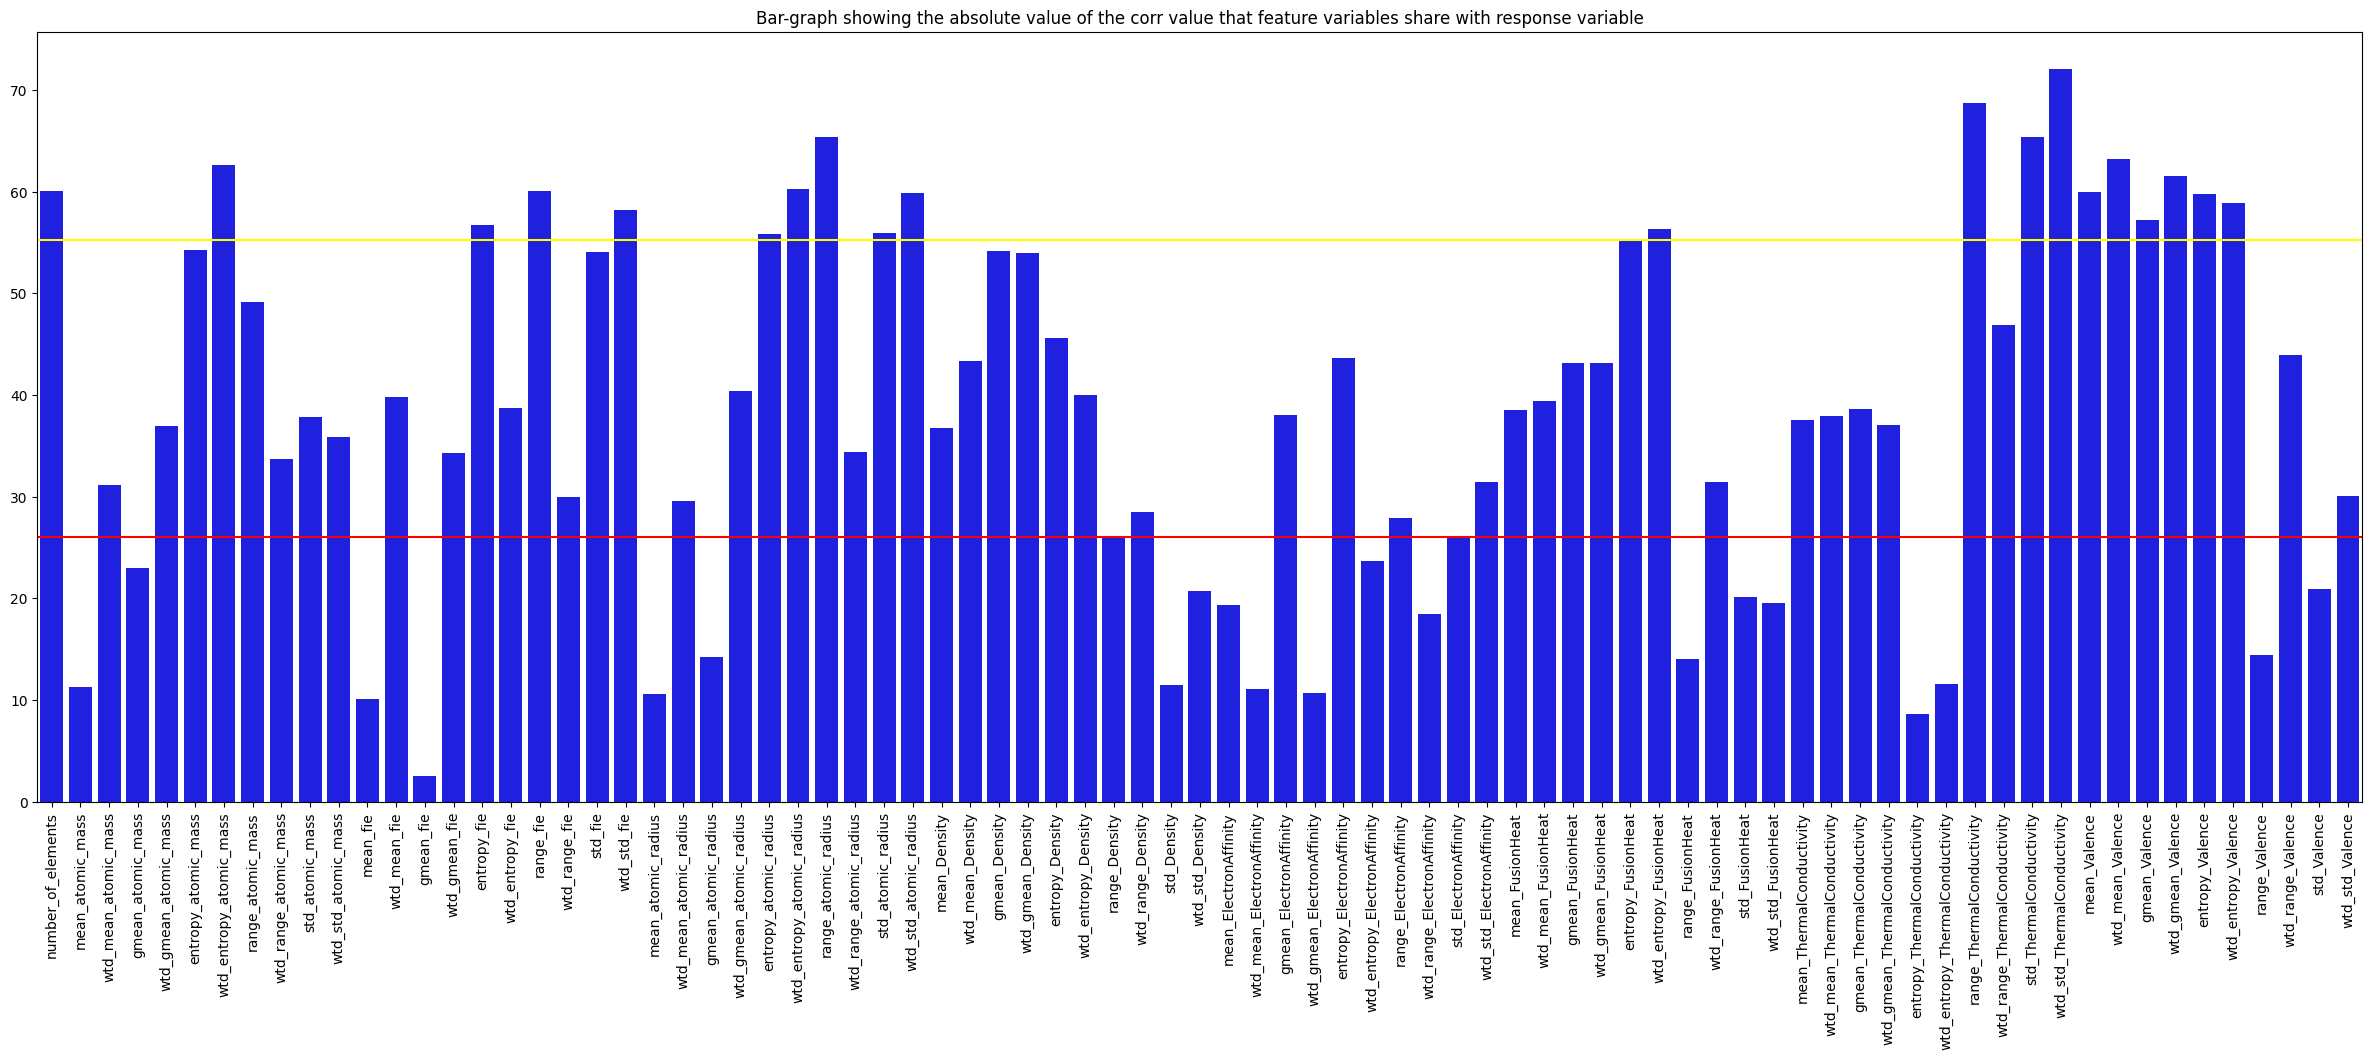

In [47]:
#Plotting the absolute distance from zero in form of a bar-graph, the purpose of plotting the bar-graph is that instead of straight-forward rejecting the properties with negative
#co-relation, only the feature variables whose absolute corr value is very close to zero are ignored
plt.figure( figsize = ( 30,10 ) )
plt.title( "Bar-graph showing the absolute value of the corr value that feature variables share with response variable" )
plt.xticks(np.arange(0,len(indexes),step=1), indexes , rotation='vertical')
sns.barplot( x= indexes , y = distance_from_zero , color = 'blue')
#Printing the lower quartile value of the absolute corr value
lower_quantile_corr_score = np.quantile( distance_from_zero , 0.25 )
#Printing the upper quartile value of the absolute corr value
upper_quantile_corr_score = np.quantile( distance_from_zero, 0.75 )
#Plotting both the quartile values as a straight line
plt.axhline( y = lower_quantile_corr_score, color = 'red' )
plt.axhline( y = upper_quantile_corr_score, color = 'yellow' )

In [48]:
#It can be observed that there are 10 columns which are not able to reach the lower quantile score of contribution, therefore we will be dropping those index values from the column
#Printing the length of the indexes list before dropping the index
print( f"The length of the indexes list before dropping the list is {len( indexes )}" )
for index, corr_score in zip( indexes, distance_from_zero ):
  if( corr_score <= lower_quantile_corr_score ):
    indexes.remove( index )
print( f"The length of the indexes list after dropping the index whose corr score don't reach the lower quantile score is { len( indexes ) }" )

The length of the indexes list before dropping the list is 81
The length of the indexes list after dropping the index whose corr score don't reach the lower quantile score is 64


In [49]:
#Reducing the feature columns to the indexes that we are left with after dropping the one with low abs corr scores and creating the feature variables dataset
atomic_properties_df_feature_variables = atomic_properties_df[ indexes ]
#Printing the columns present in the new dataframe after taking the subset
print( atomic_properties_df_feature_variables.columns )
#Creating the Response Variable dataset by selecting the critical temperature from the dataset
atomic_properties_df_response_variable = atomic_properties_df[["critical_temp"]]

Index(['number_of_elements', 'wtd_mean_atomic_mass', 'gmean_atomic_mass',
       'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass',
       'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass',
       'mean_fie', 'wtd_mean_fie', 'wtd_gmean_fie', 'entropy_fie', 'range_fie',
       'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius',
       'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'wtd_entropy_atomic_radius',
       'range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity',
       'range_ElectronAffinity', 'std_ElectronAffinity', 'mean_FusionHeat',
       'gmean_Fu

In [50]:
#Printing the feature variable dataset
print("The feature variable dataset is")
print( atomic_properties_df_feature_variables.head() )
print( "The response variable dataset is" )
print( atomic_properties_df_response_variable.head() )

The feature variable dataset is
   number_of_elements  wtd_mean_atomic_mass  gmean_atomic_mass  \
0                   4             57.862692          66.361592   
1                   5             58.518416          73.132787   
2                   4             57.885242          66.361592   
3                   4             57.873967          66.361592   
4                   4             57.840143          66.361592   

   entropy_atomic_mass  wtd_entropy_atomic_mass  range_atomic_mass  \
0             1.181795                 1.062396          122.90607   
1             1.449309                 1.057755          122.90607   
2             1.181795                 0.975980          122.90607   
3             1.181795                 1.022291          122.90607   
4             1.181795                 1.129224          122.90607   

   wtd_range_atomic_mass  std_atomic_mass  wtd_std_atomic_mass  mean_fie  ...  \
0              31.794921        51.968828            53.622535   775.

In [51]:
#Before using the variance filter, splitting the dataset into test and train dataset and checking the perfromance of the features selected by using the model.
atomic_properties_df_X_train, atomic_properties_df_X_test, atomic_properties_df_y_train, atomic_properties_df_y_test = train_test_split( atomic_properties_df_feature_variables, atomic_properties_df_response_variable, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {atomic_properties_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {atomic_properties_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {atomic_properties_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {atomic_properties_df_y_test.shape}")

The shape of the feature variable in the training dataset is (14201, 64)
The shape of the response variable in the training dataset is (14201, 1)
The shape of the feature variable in the testing dataset is (6996, 64)
The shape of the response variable in the testing dataset is (6996, 1)


In [52]:
#Fitting the model on the Linear Regression and trying to get the RMSE score on the test dataset
linearRegressionModel = LinearRegression()
#Training the model
linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions
linearModelPredictions = linearRegressionModel.predict( atomic_properties_df_X_test )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )

The mean_squared_error_values using this set of features is 18.006780430162724


In [ ]:
#Storing the index values and the
distance_from_zero = []
indexes =[]
for index in critical_temp_df.index:
  distance_from_zero.append( np.abs( critical_temp_df.loc[index] ) * 100 )
  indexes.append( index )
#Printing both the list
print( distance_from_zero )
print( indexes )

Index(['feature_name', 'variance_score'], dtype='object')


<Axes: title={'center': 'Bar-Graph showing the variance of the properties for the model'}, xlabel='feature_name', ylabel='variance_score'>

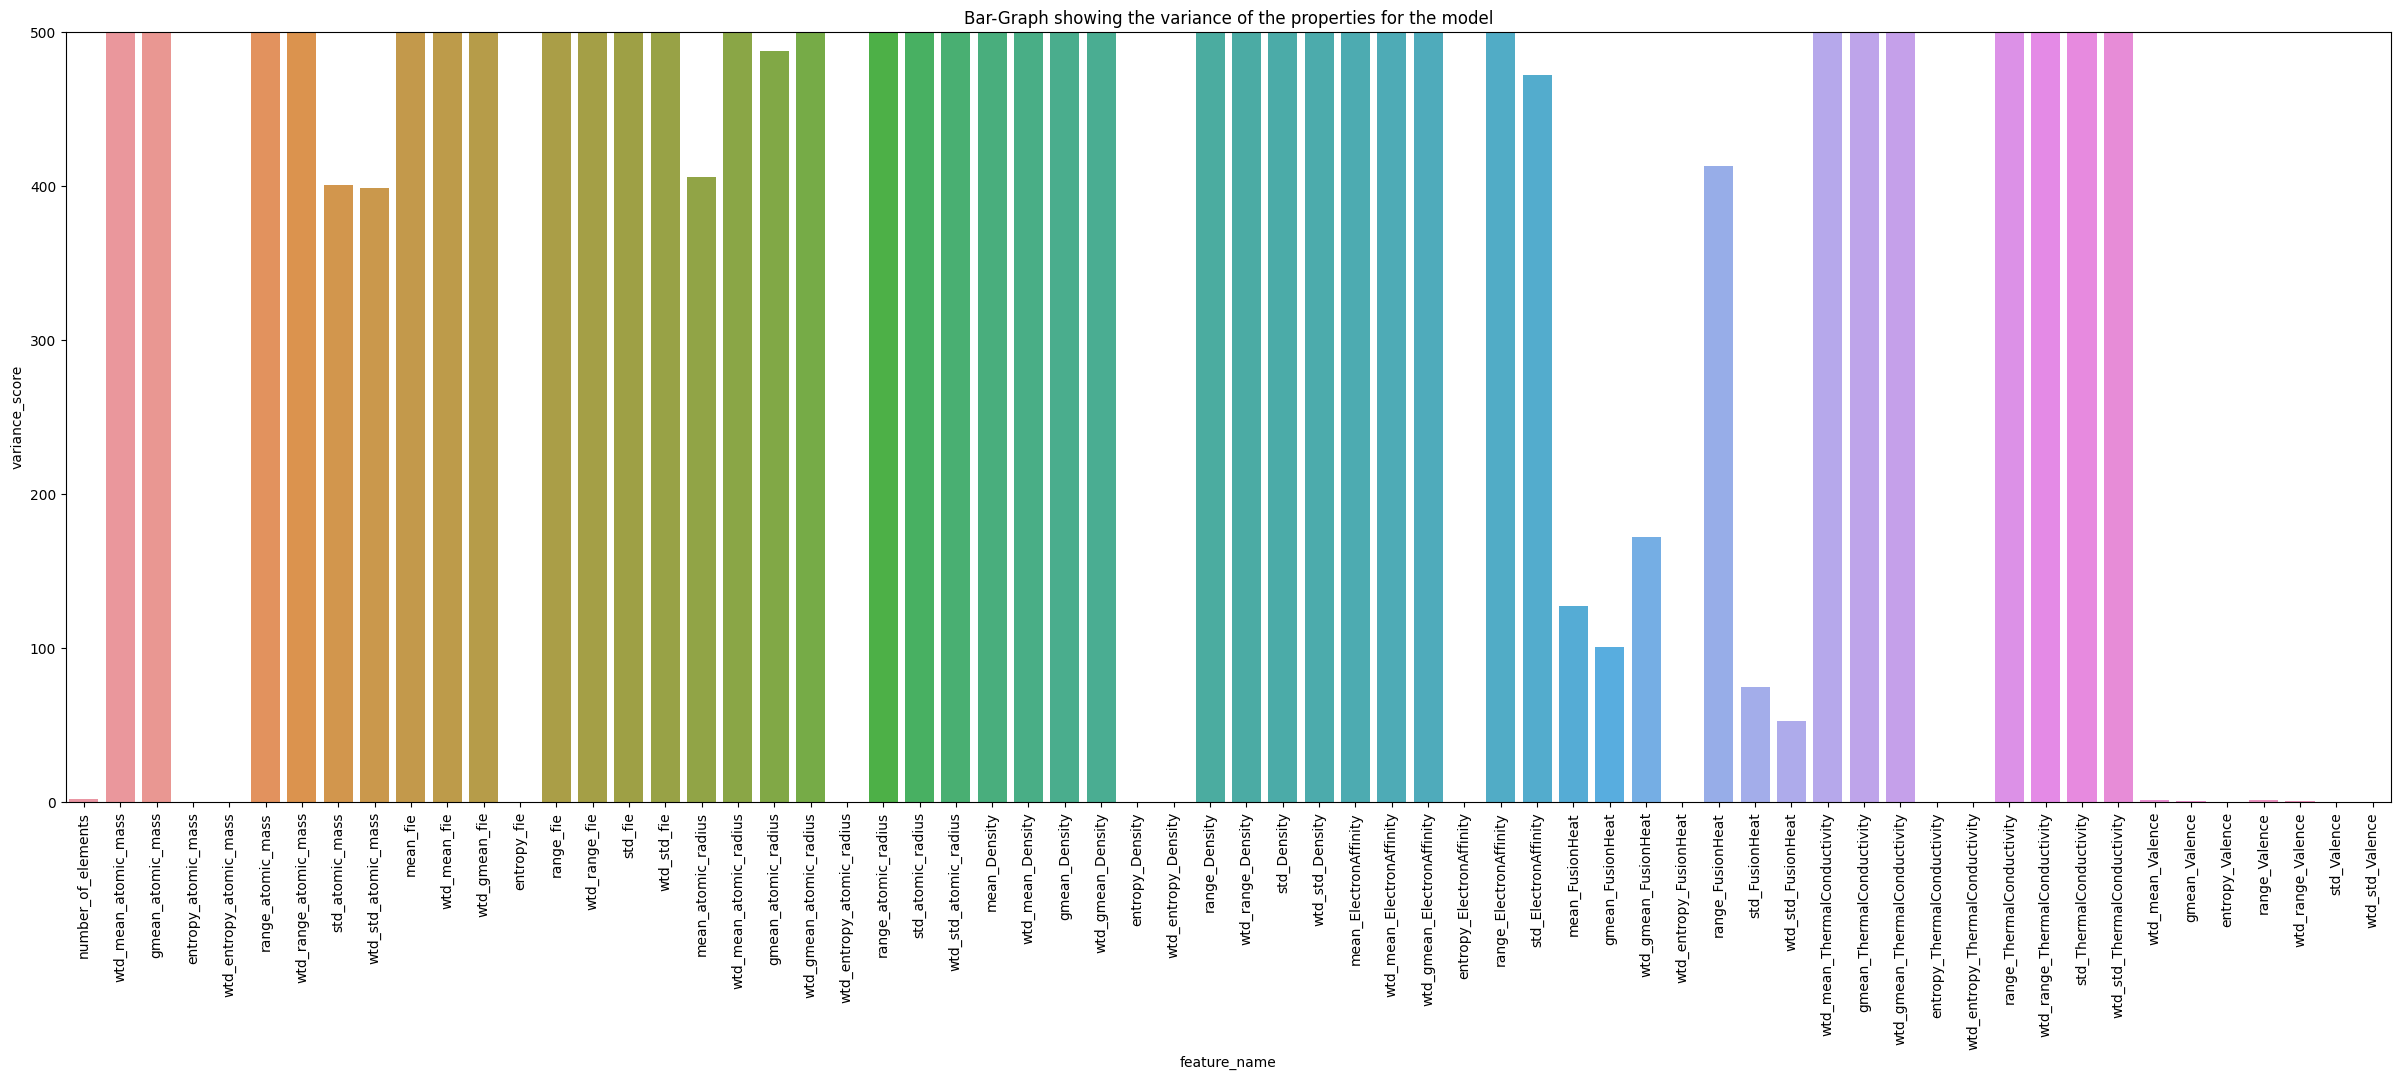

In [79]:
#Getting the variance value of the features selected in the last-feature selection iteration
atomic_properties_df_feature_variables_var = atomic_properties_df_feature_variables.var()
atomic_properties_df_feature_variables_var_df = atomic_properties_df_feature_variables_var.to_frame( name = "variance_score" )
#Resetting the index so that the index names gets converted into columns and we can plot the value in form of a bar-graph
atomic_properties_df_feature_variables_var_df = atomic_properties_df_feature_variables_var_df.reset_index( level= 0 )
atomic_properties_df_feature_variables_var_df = atomic_properties_df_feature_variables_var_df.rename( columns = {'index':'feature_name'} )
print( atomic_properties_df_feature_variables_var_df.columns )
#Plotting the bargraph
plt.figure( figsize = ( 30,10 ) )
plt.title( "Bar-Graph showing the variance of the properties for the model" )
plt.ylim(0, 500)
plt.xticks(np.arange(0,len(indexes),step=1), indexes , rotation='vertical')
sns.barplot( data = atomic_properties_df_feature_variables_var_df, x = "feature_name", y = "variance_score" )

In [82]:
#Keeping features whose variance value have more than 200 and ignoring others
atomic_properties_df_feature_variables_var_df = atomic_properties_df_feature_variables_var_df[( atomic_properties_df_feature_variables_var_df["variance_score"] >= 200 )]

In [86]:
#Printing the features_name and taking the subset of those features from the main dataset
significant_feature_names = atomic_properties_df_feature_variables_var_df["feature_name"].values.tolist()
#Printing the significant feature names
print( significant_feature_names )
#Taking the subset of these columns from the main dataframe
atomic_properties_df_feature_variables = atomic_properties_df[ significant_feature_names ]
#Printing the columns of the feature variables
print( atomic_properties_df_feature_variables.columns )

['wtd_mean_atomic_mass', 'gmean_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'wtd_gmean_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'range_ElectronAffinity', 'std_ElectronAffinity', 'range_FusionHeat', 'wtd_mean_ThermalConductivity', 'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity', 'range_ThermalConductivity', 'wtd_range_ThermalConductivity', 'std_ThermalConductivity', 'wtd_std_ThermalConductivity']
Index(['wtd_mean_atomic_mass', 'gmean_atomic_mass', 'range_atomic_mass',
       'wtd

In [87]:
#Creating Train, Test split of the dataset and checking the performance of the model
#Before using the variance filter, splitting the dataset into test and train dataset and checking the perfromance of the features selected by using the model.
atomic_properties_df_X_train, atomic_properties_df_X_test, atomic_properties_df_y_train, atomic_properties_df_y_test = train_test_split( atomic_properties_df_feature_variables, atomic_properties_df_response_variable, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {atomic_properties_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {atomic_properties_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {atomic_properties_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {atomic_properties_df_y_test.shape}")

The shape of the feature variable in the training dataset is (14201, 41)
The shape of the response variable in the training dataset is (14201, 1)
The shape of the feature variable in the testing dataset is (6996, 41)
The shape of the response variable in the testing dataset is (6996, 1)


In [88]:
#Fitting the model on the Linear Regression and trying to get the RMSE score on the test dataset
linearRegressionModel = LinearRegression()
#Training the model
linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions
linearModelPredictions = linearRegressionModel.predict( atomic_properties_df_X_test )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )

The mean_squared_error_values using this set of features is 18.740352432920933


In [89]:
#Printing the R^2 score of the classifier
r_square_value = metrics.r2_score( linearModelPredictions, atomic_properties_df_y_test )
print( f"The r_square_value of this feature of subset is { r_square_value }" )

The r_square_value of this feature of subset is 0.5745948940621874


In [91]:
#Adding a constant column so that we can get the actual VIF factor as the VIF factor assumes a constant in the calculation
#atomic_properties_filtered.loc[:,"constant_column"] = 1
#Printing the column values
atomic_properties_df_feature_variables_constant = add_constant( atomic_properties_df_feature_variables )
#Printing the columns in the constant_columns
print( atomic_properties_df_feature_variables_constant.info() )
atomic_properties_multicollinear = pd.Series([variance_inflation_factor(  atomic_properties_df_feature_variables_constant.values, i)
for i in range(  atomic_properties_df_feature_variables_constant.shape[1])],
              index=atomic_properties_df_feature_variables_constant.columns)
#Printing the series
print( atomic_properties_multicollinear )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 21262
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          21197 non-null  float64
 1   wtd_mean_atomic_mass           21197 non-null  float64
 2   gmean_atomic_mass              21197 non-null  float64
 3   range_atomic_mass              21197 non-null  float64
 4   wtd_range_atomic_mass          21197 non-null  float64
 5   std_atomic_mass                21197 non-null  float64
 6   wtd_std_atomic_mass            21197 non-null  float64
 7   mean_fie                       21197 non-null  float64
 8   wtd_mean_fie                   21197 non-null  float64
 9   wtd_gmean_fie                  21197 non-null  float64
 10  range_fie                      21197 non-null  float64
 11  wtd_range_fie                  21197 non-null  float64
 12  std_fie                        21197 non-null 

In [92]:
#Getting the value of the collinearity after dropping the values above 100 and seeing how it affects the collinearity value
atomic_properties_multicollinear_required_index = [ index for index in atomic_properties_multicollinear.index if atomic_properties_multicollinear[ index ] <= 100 ]
#Printing the length of the required index values
print( len(atomic_properties_multicollinear_required_index) )
#We see that the total_length_value dropped t0 31
#Let's see how teh collinearity is affected now
atomic_properties_df_filtered_second_phase = atomic_properties_df_feature_variables_constant[ atomic_properties_multicollinear_required_index ]
#Adding the constant
atomic_properties_df_filtered_second_phase = add_constant( atomic_properties_df_filtered_second_phase )
atomic_properties_multicollinear = pd.Series([variance_inflation_factor(  atomic_properties_df_filtered_second_phase.values, i)
for i in range(  atomic_properties_df_filtered_second_phase.shape[1])],
              index=atomic_properties_df_filtered_second_phase.columns)
#Printing the series
print( atomic_properties_multicollinear )

24
const                            202.264112
wtd_mean_atomic_mass              20.423073
gmean_atomic_mass                 15.671184
range_atomic_mass                 34.780468
wtd_range_atomic_mass              7.887714
std_atomic_mass                   32.868746
wtd_std_atomic_mass               20.491805
mean_fie                           2.511981
wtd_range_fie                      6.251004
mean_Density                       7.510732
range_Density                     35.900611
wtd_range_Density                  6.602362
std_Density                       47.643954
wtd_std_Density                   18.777331
mean_ElectronAffinity              6.434853
wtd_mean_ElectronAffinity         19.530853
wtd_gmean_ElectronAffinity        17.718611
range_ElectronAffinity            29.451875
std_ElectronAffinity              30.845949
range_FusionHeat                   1.512549
wtd_mean_ThermalConductivity      33.439213
gmean_ThermalConductivity         10.973123
wtd_gmean_ThermalConductivity

In [93]:
#Taking only those index from the seconnd cycle whose VIF factor is less than 20
properties_essential_for_third_phase = [ index for index in atomic_properties_multicollinear.index if atomic_properties_multicollinear[ index ] <=20 ]
#Printing the length of the essential properties
print( f"The length of the essential properties is { len( properties_essential_for_third_phase ) }" )
#We can see that the properties have reduced to 28
#Taking those properties only from the main dataframe
atomic_properties_df_filtered_third_phase = atomic_properties_df_feature_variables_constant[ properties_essential_for_third_phase ]
#Adding the constant and then calculating the co-relation values
#Adding the constant
atomic_properties_df_filtered_third_phase = add_constant( atomic_properties_df_filtered_third_phase )
atomic_properties_multicollinear = pd.Series([variance_inflation_factor(  atomic_properties_df_filtered_third_phase.values, i)
for i in range(  atomic_properties_df_filtered_third_phase.shape[1])],
              index=atomic_properties_df_filtered_third_phase.columns)
#Printing the series
print( atomic_properties_multicollinear )

The length of the essential properties is 13
const                            185.820093
gmean_atomic_mass                  5.625426
wtd_range_atomic_mass              3.971934
mean_fie                           2.169380
wtd_range_fie                      2.018406
mean_Density                       6.518671
wtd_range_Density                  4.456442
wtd_std_Density                    1.762384
mean_ElectronAffinity              4.680147
wtd_mean_ElectronAffinity         10.694185
wtd_gmean_ElectronAffinity         7.397951
range_FusionHeat                   1.344339
gmean_ThermalConductivity          2.096164
wtd_range_ThermalConductivity      1.312146
dtype: float64


In [105]:
#Getting the list of feature variables from the last phase of the filtering and dropping the const column
significant_features = atomic_properties_multicollinear.index.values.tolist()
#print( significant_features )
#dropping the 'const' column from the list of the feature variables
significant_features.remove( "const" )
#Updating the features column with the columns from the last round of filtering
atomic_properties_df_feature_variables = atomic_properties_df[ significant_features ]
#Printing the number of columns in the feature variables
print( atomic_properties_df_feature_variables.columns )


Index(['gmean_atomic_mass', 'wtd_range_atomic_mass', 'mean_fie',
       'wtd_range_fie', 'mean_Density', 'wtd_range_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'wtd_gmean_ElectronAffinity', 'range_FusionHeat',
       'gmean_ThermalConductivity', 'wtd_range_ThermalConductivity'],
      dtype='object')


In [106]:
#Creating Train, Test split of the dataset and checking the performance of the model
#Before using the variance filter, splitting the dataset into test and train dataset and checking the perfromance of the features selected by using the model.
atomic_properties_df_X_train, atomic_properties_df_X_test, atomic_properties_df_y_train, atomic_properties_df_y_test = train_test_split( atomic_properties_df_feature_variables, atomic_properties_df_response_variable, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {atomic_properties_df_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {atomic_properties_df_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {atomic_properties_df_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {atomic_properties_df_y_test.shape}")

The shape of the feature variable in the training dataset is (14201, 13)
The shape of the response variable in the training dataset is (14201, 1)
The shape of the feature variable in the testing dataset is (6996, 13)
The shape of the response variable in the testing dataset is (6996, 1)


In [109]:
#Fitting the model on the Linear Regression and trying to get the RMSE score on the test dataset
linearRegressionModel = LinearRegression()
#Training the model
linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
#Getting the predictions
linearModelPredictions = linearRegressionModel.predict( atomic_properties_df_X_test )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the mean squared error values
print( f"The mean_squared_error_values using this set of features is { mean_squared_error_values }" )

The mean_squared_error_values using this set of features is 23.36047555193169


In [110]:
#Printing the R^2 score of the classifier
r_square_value = metrics.r2_score( linearModelPredictions, atomic_properties_df_y_test )
print( f"The r_square_value of this feature of subset is { r_square_value }" )

The r_square_value of this feature of subset is 0.12545817981636231


In [111]:
#Reducing the feature columns to the indexes that we are left with after dropping the one with low abs corr scores and creating the feature variables dataset
atomic_properties_df_feature_variables = atomic_properties_df.drop( columns=["critical_temp"] )
#Printing the columns present in the new dataframe after taking the subset
print( atomic_properties_df_feature_variables.columns )
#Creating the Response Variable dataset by selecting the critical temperature from the dataset
atomic_properties_df_response_variable = atomic_properties_df[["critical_temp"]]

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [113]:
print( atomic_properties_df.loc[:,:"number_of_elements"] )

       number_of_elements
0                       4
1                       5
2                       4
3                       4
4                       4
...                   ...
21258                   4
21259                   5
21260                   2
21261                   2
21262                   3

[21197 rows x 1 columns]


In [115]:
r_squared_value_scores = []
mean_squared_error_values = []
for column in atomic_properties_df_feature_variables.columns:
  atomic_properties_df_feature_variables = atomic_properties_df.loc[:,:column]
  #Creating Train, Test split of the dataset and checking the performance of the model
  #Before using the variance filter, splitting the dataset into test and train dataset and checking the perfromance of the features selected by using the model.
  atomic_properties_df_X_train, atomic_properties_df_X_test, atomic_properties_df_y_train, atomic_properties_df_y_test = train_test_split( atomic_properties_df_feature_variables, atomic_properties_df_response_variable, test_size=0.33, random_state=42 )
  #Printing the shape of the training and testing dataset so as to ensure that everything is correct
  #print( f"The shape of the feature variable in the training dataset is {atomic_properties_df_X_train.shape}" )
  #print( f"The shape of the response variable in the training dataset is {atomic_properties_df_y_train.shape}")
  #print( f"The shape of the feature variable in the testing dataset is {atomic_properties_df_X_test.shape}" )
  #print( f"The shape of the response variable in the testing dataset is {atomic_properties_df_y_test.shape}")
  #Fitting the model on the Linear Regression and trying to get the RMSE score on the test dataset
  linearRegressionModel = LinearRegression()
  #Training the model
  linearRegressionModel.fit( atomic_properties_df_X_train, atomic_properties_df_y_train )
  #Getting the predictions
  linearModelPredictions = linearRegressionModel.predict( atomic_properties_df_X_test )
  #Getting the RMSE scores
  mean_squared_error_value = metrics.mean_squared_error( linearModelPredictions, atomic_properties_df_y_test, squared= False )
  #Converting the RMSE values to a dataframe
  #mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
  #Printing the mean squared error values
  print( f"The mean_squared_error_values using this set of features is { mean_squared_error_value }" )
  mean_squared_error_values.append( mean_squared_error_value )
  r_square_value = metrics.r2_score( linearModelPredictions, atomic_properties_df_y_test )
  print( f"The r_square_value of this feature of subset is { r_square_value }" )
  r_squared_value_scores.append( r_square_value )


The mean_squared_error_values using this set of features is 27.546097883445906
The r_square_value of this feature of subset is -0.7798481821056296
The mean_squared_error_values using this set of features is 27.535108522572607
The r_square_value of this feature of subset is -0.7735918859284785
The mean_squared_error_values using this set of features is 27.004480927719158
The r_square_value of this feature of subset is -0.6340893400652812
The mean_squared_error_values using this set of features is 26.895634649699165
The r_square_value of this feature of subset is -0.6108390251556182
The mean_squared_error_values using this set of features is 26.756285690084383
The r_square_value of this feature of subset is -0.563425116213752
The mean_squared_error_values using this set of features is 26.763078352551236
The r_square_value of this feature of subset is -0.5629480923136081
The mean_squared_error_values using this set of features is 26.02402632549211
The r_square_value of this feature of sub

In [116]:
#Printing the mean squared error values
print( mean_squared_error_values )
#Printing the r-squared value scores
print( r_squared_value_scores )

[27.546097883445906, 27.535108522572607, 27.004480927719158, 26.895634649699165, 26.756285690084383, 26.763078352551236, 26.02402632549211, 25.86699769122897, 25.836088221833467, 25.363791050784656, 25.362136614395162, 25.34770502935377, 25.275209678671438, 24.904523806789857, 24.131846885484148, 24.003477231867517, 23.893127788641458, 23.65452031774144, 23.59871034554334, 23.43522792213187, 23.427340250447184, 23.236386964165263, 23.205306013900405, 22.205981979992274, 22.09824293223213, 21.631745057048462, 21.571796765734483, 21.511742378431546, 21.45374888768283, 20.79746793103152, 20.73736817492456, 20.616916175323016, 20.6075240986044, 20.60193313265272, 20.60297796585043, 20.546693473823638, 20.188475797610582, 20.185603727066827, 20.15803586651739, 20.150944012267995, 20.1519713928478, 20.13285105886774, 20.128467279929442, 19.994246879401377, 19.95377688968059, 19.902176697658476, 19.898251575991203, 19.765304490500117, 19.70849378658344, 19.578372534987725, 19.356474408660457,

In [ ]:
#Getting the co-relation matrix
atomic_properties_df_corr = atomic_properties_df.corr()
#Printing the co-relation matrix
#print( atomic_properties_df_corr.head() )
#Since we are interested in the propertie for the critical_temp only, we will be extracting that feature only
critical_temp_df = atomic_properties_df_corr.loc["critical_temp",:]
#printing the critical_temp_df columns before dropping the critical_temp column
print( critical_temp_df.head() )
#Dropping the critical_temp column and seeing the co-relation values for other
critical_temp_df = critical_temp_df.drop( index=["critical_temp"] )
#printing the columns after dropping the critical_temp column
print( critical_temp_df.index)

number_of_elements       0.601069
mean_atomic_mass        -0.113523
wtd_mean_atomic_mass    -0.312272
gmean_atomic_mass       -0.230345
wtd_gmean_atomic_mass   -0.369858
Name: critical_temp, dtype: float64
Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_

In [ ]:
#Getting all the index names where the co-relation value is greater than 0
properties_with_corelation_greater_than_zero = []
for index in critical_temp_df.index:
  if( critical_temp_df[index] > 0 ):
    properties_with_corelation_greater_than_zero.append( index )

#Printing all the indexes where the index value is greater than zero
print( "The index values where the co-relation is greater than zero" )
print( properties_with_corelation_greater_than_zero )
print( "The length of the total number of properties where the co-relation is greater than zero " )
print( len(properties_with_corelation_greater_than_zero ))
#So, out of 82 properties, we have identified 44 properties which are having positive co-relation.
properties_with_corelation_greater_than_zero.append( 'critical_temp' )

The index values where the co-relation is greater than zero
['number_of_elements', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'std_Density', 'wtd_std_Density', 'wtd_mean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity', 'range_ElectronAffinity', 'wtd_range_ElectronAffinity', 'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity', 'entropy_ThermalConductivity', 'range_ThermalConductivity', 'wtd_range_ThermalConductivity', 'std_ThermalConductivity', 'wtd_s

In [ ]:
#It's important to identify which columns are having multi-collinearity or not, if having multi-collinearity, we can try to see if it can be removed
#Filtering the dataframe to have those number of columns only
atomic_properties_filtered = atomic_properties_df[ properties_with_corelation_greater_than_zero ]
#Printing the columns of critical temp filtered head
print( atomic_properties_filtered.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number_of_elements             21263 non-null  int64  
 1   entropy_atomic_mass            21263 non-null  float64
 2   wtd_entropy_atomic_mass        21263 non-null  float64
 3   range_atomic_mass              21263 non-null  float64
 4   std_atomic_mass                21263 non-null  float64
 5   wtd_std_atomic_mass            21263 non-null  float64
 6   mean_fie                       21263 non-null  float64
 7   wtd_mean_fie                   21263 non-null  float64
 8   wtd_gmean_fie                  21263 non-null  float64
 9   entropy_fie                    21263 non-null  float64
 10  wtd_entropy_fie                21263 non-null  float64
 11  range_fie                      21263 non-null  float64
 12  wtd_range_fie                  21263 non-null 

In [ ]:
#Getting the VIF columns for the values
atomic_properties_filtered_VIF = pd.DataFrame()
atomic_properties_filtered_VIF["atomic_property"] = atomic_properties_filtered.columns
atomic_properties_filtered_VIF["VIF"] = [variance_inflation_factor( atomic_properties_df_corr.values, i) for i in range( atomic_properties_filtered.shape[1] )]
#Printing the VIF dataframe created
atomic_properties_filtered_VIF["VIF"] = atomic_properties_filtered_VIF.apply( lambda row : "{:f}".format( row["VIF"] ), axis= 1)
print( atomic_properties_filtered_VIF.head(5) )


           atomic_property              VIF
0       number_of_elements   1119462.543833
1      entropy_atomic_mass   9503478.324570
2  wtd_entropy_atomic_mass  37457851.356224
3        range_atomic_mass  14122719.032778
4          std_atomic_mass  54366228.677268


Since, the values were really high and it struck as odd, researching further pointed out a bug/design-flaw in the variance_inflation_librray of the statsmodel.

https://github.com/statsmodels/statsmodels/issues/2376
https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

In [ ]:
#Adding a constant column so that we can get the actual VIF factor as the VIF factor assumes a constant in the calculation
#atomic_properties_filtered.loc[:,"constant_column"] = 1
#Printing the column values
atomic_properties_filtered_with_constant = add_constant( atomic_properties_filtered )
#Printing the columns in the constant_columns
print( atomic_properties_filtered_with_constant.info() )
atomic_propeprties_multicollinear = pd.Series([variance_inflation_factor(  atomic_properties_filtered_with_constant.values, i)
for i in range(  atomic_properties_filtered_with_constant.shape[1])],
              index=atomic_properties_filtered_with_constant.columns)
#Printing the series
print( atomic_propeprties_multicollinear )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          21263 non-null  float64
 1   number_of_elements             21263 non-null  int64  
 2   entropy_atomic_mass            21263 non-null  float64
 3   wtd_entropy_atomic_mass        21263 non-null  float64
 4   range_atomic_mass              21263 non-null  float64
 5   std_atomic_mass                21263 non-null  float64
 6   wtd_std_atomic_mass            21263 non-null  float64
 7   mean_fie                       21263 non-null  float64
 8   wtd_mean_fie                   21263 non-null  float64
 9   wtd_gmean_fie                  21263 non-null  float64
 10  entropy_fie                    21263 non-null  float64
 11  wtd_entropy_fie                21263 non-null  float64
 12  range_fie                      21263 non-null 

In [ ]:
#Getting the value of the collinearity after dropping the values above 100 and seeing how it affects the collinearity value
atomic_propeprties_multicollinear_required_index = [ index for index in atomic_propeprties_multicollinear.index if atomic_propeprties_multicollinear[ index ] <= 100 ]
#Printing the length of the required index values
print( len(atomic_propeprties_multicollinear_required_index) )
#We see that the total_length_value dropped t0 31
#Let's see how teh collinearity is affected now
atomic_properties_df_filtered_second_phase = atomic_properties_filtered_with_constant[ atomic_propeprties_multicollinear_required_index ]
#Adding the constant
atomic_properties_df_filtered_second_phase = add_constant( atomic_properties_df_filtered_second_phase )
atomic_propeprties_multicollinear = pd.Series([variance_inflation_factor(  atomic_properties_df_filtered_second_phase.values, i)
for i in range(  atomic_properties_df_filtered_second_phase.shape[1])],
              index=atomic_properties_df_filtered_second_phase.columns)
#Printing the series
print( atomic_propeprties_multicollinear )

31
const                            800.441472
number_of_elements                26.289322
wtd_entropy_atomic_mass           25.292907
range_atomic_mass                 44.855070
std_atomic_mass                   38.590266
wtd_std_atomic_mass               22.900189
mean_fie                           4.677650
wtd_entropy_fie                   36.022640
wtd_range_fie                     15.968395
mean_atomic_radius                 3.110459
wtd_std_atomic_radius              6.932198
entropy_Density                   26.716855
wtd_entropy_Density               18.969056
range_Density                     42.406825
std_Density                       61.594467
wtd_std_Density                   20.923618
wtd_mean_ElectronAffinity          7.522871
entropy_ElectronAffinity          22.759503
wtd_entropy_ElectronAffinity      19.852400
range_ElectronAffinity            50.363263
wtd_range_ElectronAffinity        15.179439
std_ElectronAffinity              67.624735
wtd_std_ElectronAffinity     

In [ ]:
#Taking only those index from the seconnd cycle whose VIF factor is less than 50
properties_essential_for_third_phase = [ index for index in atomic_propeprties_multicollinear.index if atomic_propeprties_multicollinear[ index ] <=50 ]
#Printing the length of the essential properties
print( f"The length of the essential properties is { len( properties_essential_for_third_phase ) }" )
#We can see that the properties have reduced to 28
#Taking those properties only from the main dataframe
atomic_properties_df_filtered_third_phase = atomic_properties_df[ properties_essential_for_third_phase ]
#Adding the constant and then calculating the co-relation values
#Adding the constant
atomic_properties_df_filtered_third_phase = add_constant( atomic_properties_df_filtered_third_phase )
atomic_propeprties_multicollinear = pd.Series([variance_inflation_factor(  atomic_properties_df_filtered_third_phase.values, i)
for i in range(  atomic_properties_df_filtered_third_phase.shape[1])],
              index=atomic_properties_df_filtered_third_phase.columns)
#Printing the series
print( atomic_propeprties_multicollinear )
#Won't reduce any other properties after this as reducing any more features involve including losing the properties of Valence section as well. We will try to see the RMSE error that comes from this value and then
#continue further.

The length of the essential properties is 28
const                            772.092252
number_of_elements                22.801621
wtd_entropy_atomic_mass           23.447467
range_atomic_mass                 43.983955
std_atomic_mass                   33.243984
wtd_std_atomic_mass               20.344569
mean_fie                           4.441361
wtd_entropy_fie                   35.679912
wtd_range_fie                     15.559966
mean_atomic_radius                 3.078526
wtd_std_atomic_radius              6.662701
entropy_Density                   21.585231
wtd_entropy_Density               17.025338
range_Density                     12.623673
wtd_std_Density                   14.067935
wtd_mean_ElectronAffinity          7.432277
entropy_ElectronAffinity          15.223059
wtd_entropy_ElectronAffinity      13.480026
wtd_range_ElectronAffinity        13.965008
wtd_std_ElectronAffinity           4.142970
entropy_FusionHeat                16.533714
wtd_entropy_FusionHeat         

In [ ]:
#Extracting these features from the main dataframe and saving it in a csv file
print( atomic_propeprties_multicollinear.index )
#Dropping the const column
atomic_propeprties_multicollinear = atomic_propeprties_multicollinear.loc["number_of_elements":]
#Printing the properties list after dropping the 'const'
print( atomic_propeprties_multicollinear.index )
#Extracting all the required columns from the index for the database
atomic_properties_filtered = atomic_properties_df[ atomic_propeprties_multicollinear.index.tolist() ]
#Printing the columns available in the filtered dataframe
print( atomic_properties_filtered.info() )

Index(['number_of_elements', 'wtd_entropy_atomic_mass', 'range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_entropy_fie',
       'wtd_range_fie', 'mean_atomic_radius', 'wtd_std_atomic_radius',
       'entropy_Density', 'wtd_entropy_Density', 'range_Density',
       'wtd_std_Density', 'wtd_mean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'wtd_range_ElectronAffinity', 'wtd_std_ElectronAffinity',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat',
       'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'wtd_std_ThermalConductivity', 'wtd_entropy_Valence', 'critical_temp'],
      dtype='object')
Index(['number_of_elements', 'wtd_entropy_atomic_mass', 'range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_entropy_fie',
       'wtd_range_fie', 'mean_atomic_radius', 'wtd_std_atomic_radius

In [ ]:
#Splitting the dataset into feature variables and response variable
atomic_properties_filtered_X = atomic_properties_filtered.drop( columns=["critical_temp"] )
atomic_properties_filtered_y = atomic_properties_filtered["critical_temp"]
#printing the feature variable dataset and the response variable dataset
print( "The feature variable dataset is " )
print( atomic_properties_filtered_X.head() )
print( "The response variable dataset is " )
print( atomic_properties_filtered_y.head() )
#Creating the train-test split
atomic_properties_filtered_X_train, atomic_properties_filtered_X_test, atomic_properties_filtered_y_train, atomic_properties_filtered_y_test = train_test_split( atomic_properties_filtered_X,
                                                                                                                                                                atomic_properties_filtered_y, test_size=0.33, random_state=42 )
#Printing the shape of the training and testing dataset so as to ensure that everything is correct
print( f"The shape of the feature variable in the training dataset is {atomic_properties_filtered_X_train.shape}" )
print( f"The shape of the response variable in the training dataset is {atomic_properties_filtered_y_train.shape}")
print( f"The shape of the feature variable in the testing dataset is {atomic_properties_filtered_X_test.shape}" )
print( f"The shape of the response variable in the testing dataset is {atomic_properties_filtered_y_test.shape}")

The feature variable dataset is 
   number_of_elements  wtd_entropy_atomic_mass  range_atomic_mass  \
0                   4                 1.062396          122.90607   
1                   5                 1.057755          122.90607   
2                   4                 0.975980          122.90607   
3                   4                 1.022291          122.90607   
4                   4                 1.129224          122.90607   

   std_atomic_mass  wtd_std_atomic_mass  mean_fie  wtd_entropy_fie  \
0        51.968828            53.622535   775.425         0.791488   
1        47.094633            53.979870   766.440         0.807078   
2        51.968828            53.656268   775.425         0.773620   
3        51.968828            53.639405   775.425         0.783207   
4        51.968828            53.588771   775.425         0.805230   

   wtd_range_fie  mean_atomic_radius  wtd_std_atomic_radius  ...  \
0     735.985714              160.25              69.235569  ..

In [ ]:
#Fitting the model on the Linear Regression and trying to get the RMSE score on the test dataset
linearRegressionModel = LinearRegression()
#Training the model
linearRegressionModel.fit( atomic_properties_filtered_X_train, atomic_properties_filtered_y_train )
#Getting the predictions
linearModelPredictions = linearRegressionModel.predict( atomic_properties_filtered_X_test )
#Getting the RMSE scores
mean_squared_error_values = metrics.mean_squared_error( linearModelPredictions, atomic_properties_filtered_y_test, squared= False )
#Converting the RMSE values to a dataframe
#mean_squared_error_values_df = pd.DataFrame( mean_squared_error_values, columns=["error_value"] )
#Printing the dataframe
print( mean_squared_error_values )

19.694334030113463


In [ ]:
#printing column names with atomic mass only
for column in atomic_properties_df.columns:
  if( 'atomic_mass' in column ):
    print( column )

mean_atomic_mass
wtd_mean_atomic_mass
gmean_atomic_mass
wtd_gmean_atomic_mass
entropy_atomic_mass
wtd_entropy_atomic_mass
range_atomic_mass
wtd_range_atomic_mass
std_atomic_mass
wtd_std_atomic_mass
